## Assignment -1
##  Deep Learning - AI5100
## Author - Sarvesh Purohit
##                AI22MTECH14006 
##                MTech AI ,Department Of AI

**Importing the required modules**

In [ ]:
import random
import math
import numpy as np
#I am using only these 3 method from sklearn that too with the permission taken from professor
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#Q-1. Perceptron learning algorithm
[10 = dataset creation 2 + perceptron learning algorithm 5 + analysis 3]
Implement perceptron learning algorithm for classifying a linearly separable dataset in 2D. Note
that you have to create such a dataset with at least 1000 data points.
Discuss your observations with respect to number of iterations required for perfect classification (k)
by varying the level of separability (γ from the class discussions) in the dataset. (Hint: compute
the average value of k for each level of γ, and do this for about 5 values of γ. Observe if you can
relate to the result discussed in class)

In [ ]:
#------------------------------------------------------------code and explanation start from here-------------------------------------------------------------#

(based on class discussion and mail conversation with sir) : In the convergence proof of percepteon, **separability** (the minimum distance) need not be from the line our perceptron learn, it is from some line that separates the data. so, considering a different line(but fixed for all different dataset) since it is not guaranteed that you will learn the same line across different experiments.We will generate data with increasing separation and run the perceptron algorithm for each data. Now we will try to Observe that when the separation between the classes (clusters) increase what happens to the convergence. 

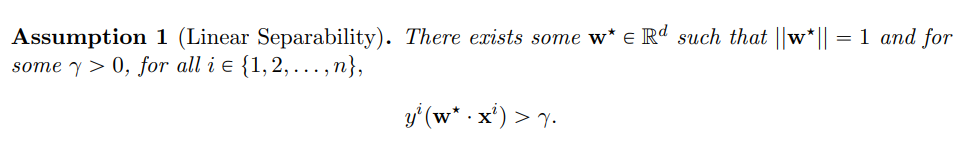

In [ ]:
#-------------------------Fixing the one line related to W* which Separates the data by using this Line we will find the value of Gamma-------------#

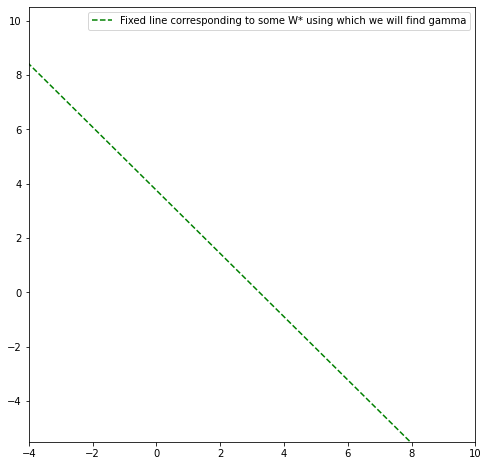

In [ ]:
blue = np.random.normal(0,1,(500,2))
orange = np.random.normal(6,1,(500,2))
#Fixing one line which separates our data based in this we will calculate the value of gamma
W_star = [-1.86, -1.6, 6.0]
x1 = np.linspace(-5,11,100)
y1 = -(W_star[0]/W_star[1])*x1-(W_star[2]/W_star[1])

plt.figure(figsize=(8,8))
plt.plot(x1,y1, color = 'green',linestyle='dashed',label = "Fixed line corresponding to some W* using which we will find gamma")
plt.xlim(-4,10)
plt.ylim(-5.5,10.5)
plt.legend()
plt.show()

In [ ]:
#----------------------------------------------------------------function for the calculation of gamma--------------------------------------------------------------------------------#

Using below function we will calculate the The gamma value

In [ ]:
def gamma_calculation(X,W_star):
  gamma = 10000
  for x in X:
      numerator = abs(W_star[0]*x[0]+W_star[1]*x[1]+W_star[2])
      denominator = math.sqrt((W_star[0])*(W_star[0]) + (W_star[1])*(W_star[1]))
      temp = numerator / denominator
      if(gamma > temp):
        gamma = temp
  return gamma


In [ ]:
#------------------------------------------------------Below cell is the implementation of the perceptron algorithm--------------------------------------------------#

In [ ]:
def train_perceptron(x, y, w, dataset_number):  
  total_updation = 0
  epoch = 0
  while(True):
    nb_changes=0
    for i in range(1000):
      if (x[i].dot(w) * y[i] <= 0):
        w = w + y[i] * x[i]
        nb_changes = nb_changes + 1
    
    total_updation = total_updation + nb_changes
    epoch = epoch +1
    if nb_changes == 0:
        #print('last interation number {} and datset number {}'.format(k,dataset_number+1)) 
        break; 
  return w,total_updation

In [ ]:
#----------------------------------------running The percepteon for 5 different dataset each different gamma values--------------------#

---->DATASET: 1



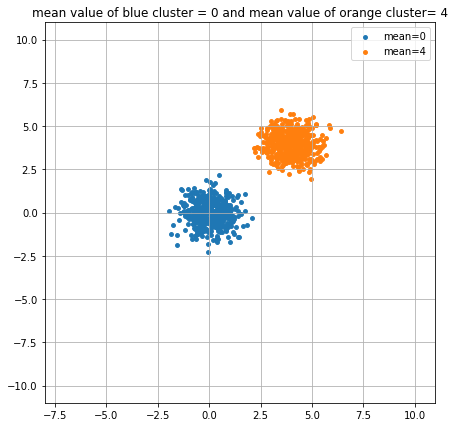

For Gamma value: 0.438898065842757
number of updation our Perceptron Made for finding Classifier: 10
classifier's equation: -1.86 x1 + -1.6 x2 + 6.0



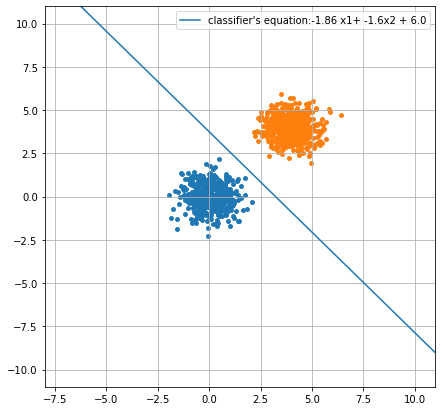



---->DATASET: 2



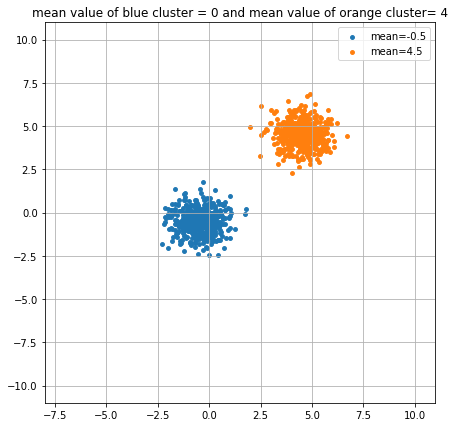

For Gamma value: 0.9778620512337131
number of updation our Perceptron Made for finding Classifier: 8
classifier's equation: -1.15 x1 + -2.13 x2 + 6.0



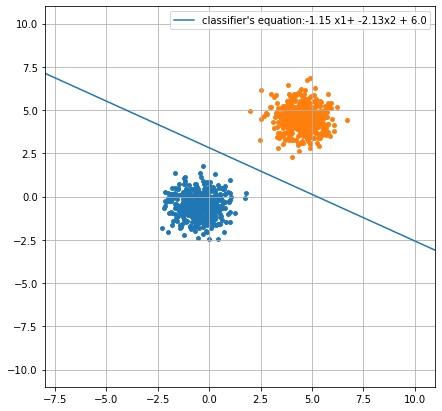



---->DATASET: 3



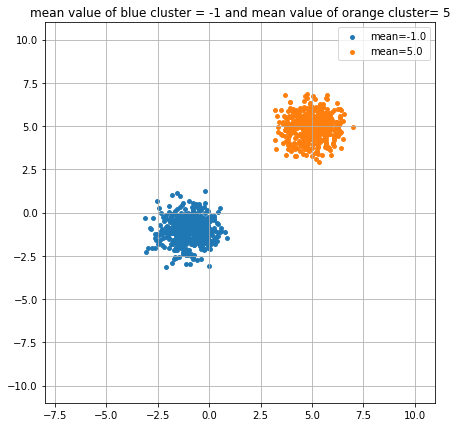

For Gamma value: 1.784338959775628
number of updation our Perceptron Made for finding Classifier: 6
classifier's equation: -4.65 x1 + -2.74 x2 + 4.0



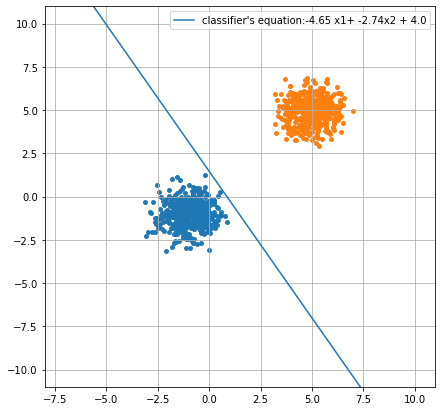



---->DATASET: 4



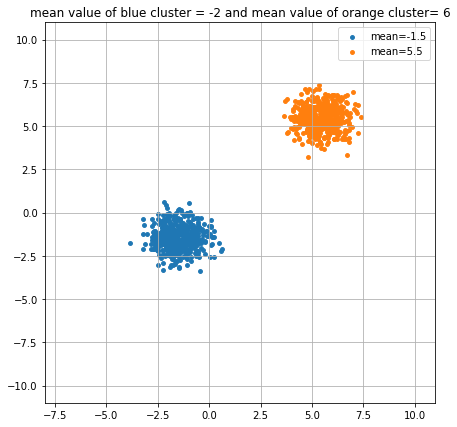

For Gamma value: 2.639161733273351
number of updation our Perceptron Made for finding Classifier: 1
classifier's equation: -5.66 x1 + -6.64 x2 + -1.0



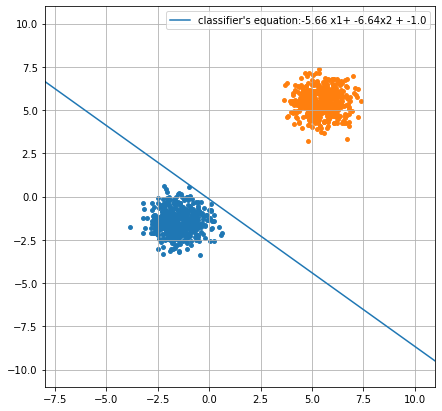



---->DATASET: 5



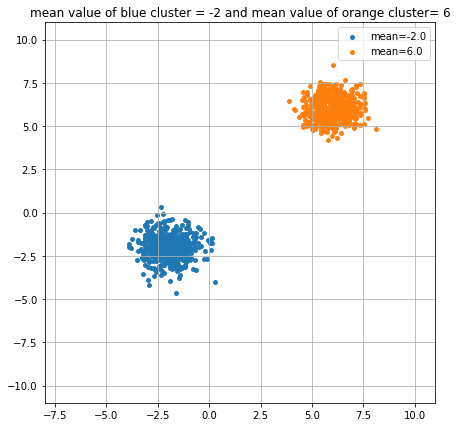

For Gamma value: 3.3155079643427636
number of updation our Perceptron Made for finding Classifier: 1
classifier's equation: -6.07 x1 + -5.5 x2 + -1.0



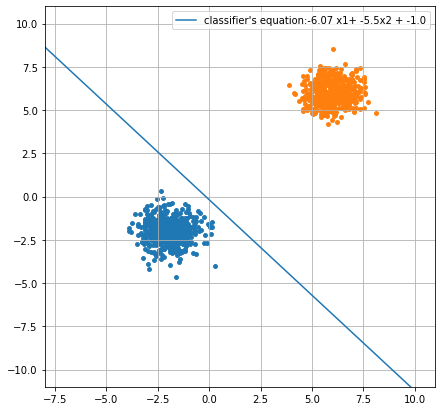

In [ ]:
np.random.seed(52)

#list to store different values of gamma i.e linear-separability
gamma = []

#list to store how many time our perceptron updating/adjusting line i.e learning from mistakes(number of miss-classification till we achieve 0 misclassification)
number_updation= []

#Initializing mean value for 1st dataset
mean_blue = 0
mean_orange = 4


#This for loop will run 5 times, because we have to do the obeservation for different 5 values of linear-separability(i.e gamma)
for i in range(5):
  if i>0:
    mean_blue = mean_blue - 0.5
    mean_orange = mean_orange + 0.5  
  
  #Generating Dataset according to current mean values
  blue = np.random.normal(mean_blue,0.7,(500,2))
  orange = np.random.normal(mean_orange,0.7,(500,2))
   
  #-------------------------------------------------------dataset creation------------------------------------------------------------#
  X=np.ones((1000,3))
  X[::2,:2] = blue
  X[1::2,:2] = orange
  #adding one extra dimentation to data
  Y=np.ones((1000,1))
  Y[::2,:2] = 1.0
  Y[1::2,:2] = -1.0
  #shuffling data to remove any kind of bias
  X, Y = shuffle(X, Y, random_state=42)
  #-------------------------------------------------------dataset is created------------------------------------------------------------#

  
  #finding value of gamma
  gamma.append(gamma_calculation(X,W_star))

  
  #ploting current dataset before calling perceptron
  print("---->DATASET:",i+1)
  print()
  plt.figure(figsize=(7,7))
  plt.scatter(blue[:,0],blue[:,1],label = "mean={}".format(mean_blue),s=15)
  plt.scatter(orange[:,0],orange[:,1],label = "mean={}".format(mean_orange),s=15)
  plt.title("mean value of blue cluster = {} and mean value of orange cluster= {}".format(round(mean_blue),round(mean_orange)))
  plt.xlim(-8, 11)
  plt.ylim(-11, 11)
  plt.legend()
  plt.grid()
  plt.show()


  #running perceptron
  W = [0, 0 ,0] #Initializing W's values
  W,k = train_perceptron(X,Y, W,i)
  number_updation.append(k)


  print("For Gamma value:",gamma[i])
  print("number of updation our Perceptron Made for finding Classifier:",k)
  print("classifier's equation:",round(W[0],2),"x1 +",round(W[1],2),"x2 +",round(W[2],2))
  print()

 

  #ploting the classifier
  x1 = np.linspace(-10,11,100) 
  y1 = -(W[0]/W[1])*x1-(W[2]/W[1])
  plt.figure(figsize=(7,7))
  plt.xlim(-8, 11)
  plt.ylim(-11, 11)
  plt.plot(x1,y1,label="classifier's equation:{} x1+ {}x2 + {}".format(round(W[0],2),round(W[1],2),round(W[2],2)))
  plt.scatter(blue[:,0],blue[:,1],s=15)
  plt.scatter(orange[:,0],orange[:,1],s=15)
  plt.grid()
  plt.legend()
  plt.show()
  print()
  print()

In [ ]:
#-------------------------------------------------------------------------Final Analysis-----------------------------------------------------------------------------#

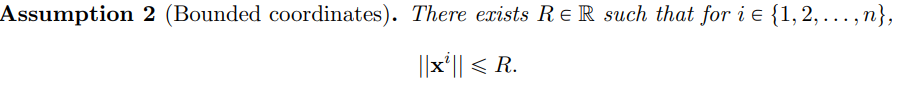

In [ ]:
#Finding the value of R based on above definition
R=math.dist([0,0],[10,10])

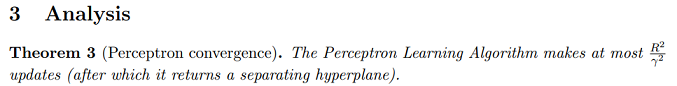

In [ ]:
R_square_by_gamma_square = [(R*R/(i*i)) for i in gamma]

print("value of 1/(gamma)^2 for 5 dataset: ",R_square_by_gamma_square)
print("number of updatation our percepteon is making 5 dataset:",number_updation)

value of 1/(gamma)^2 for 5 dataset:  [1038.2517258745133, 209.15815915680503, 62.81672342370431, 28.714283549859342, 18.194069304565]
number of updatation our percepteon is making 5 dataset: [10, 8, 6, 1, 1]


As we can observe that for each dataset the number of update our perceptron makes is $k < R^2/\gamma^2 $
i.e
* 10< 1038.25
* 8< 209.15
* 6< 62.81
* 1< 28.71
* 1< 18.19
    

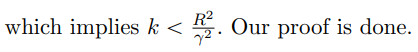

#Q-2. Gradient descent for training a linear classifier
[10 = loss formulation 4 + gradient computation 3 + update equation 3]
Consider solving the above problem (training a line for classifying a linearly separable 2D dataset)
using Gradient Descent algorithm. Think of a loss function based on our classroom discussion.
You may implement the analytical way of finding gradient for it. You may implement the basic
version of gradient descent update equation.

In [ ]:
#---------------------------------------------------------------code and explanation starts from here------------------------------------------------------------------#

**Given** : 2D dataset of size 1000 i.e D = {(x1,y1),(x2,y2),.....,(x1000,y1000)} which is $\underline{linealy\ separable.}$\
**Goal** : Goal is to $\underline{predict\ linear\ classifier}$ of the form W1*X + W2*Y + b for above 2D data set \




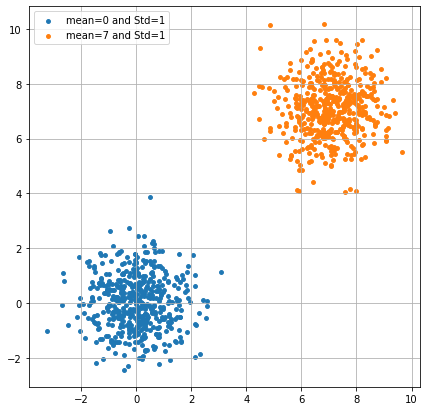

In [ ]:
#-------------------------------------------------------------Dataset creation--------------------------------------------------------------------#
np.random.seed(42)
  
#Creating linearly Separable Data from the Normal distribution
blue = np.random.normal(0,1,(500,2))
orange = np.random.normal(7,1,(500,2)) #Incresing the mean to generate Linearly separable data

#ploting the Lineraly Separable Data
plt.figure(figsize=(7,7))
plt.scatter(blue[:,0],blue[:,1],label="mean=0 and Std=1",s=15)
plt.scatter(orange[:,0],orange[:,1],label="mean=7 and Std=1",s=15)
plt.legend()
plt.grid()
plt.show()

# ones to Add the extra dimension (1) to data because we want to learn classifier of the form W1*X1 + W2*X2 + W3
X=np.ones((1000,3))
X[::2,:2] = blue
X[1::2,:2] = orange

#generating labels, all blue points are of class 1 and orange points are of class -1
Y=np.ones((1000,1))
Y[::2,:2] = 1.0
Y[1::2,:2] = -1.0

#so Finally X has data pih(X) input in form of [x1 x2 1] and Y has labels
#shuffling dataponits to avoid Overfitting
X, Y = shuffle(X, Y,random_state=42)

For classification problem main loss function choices are
* 0-1 Loss : The main problem with 0-1 Loss Function is that it is not differentiable. Therefore it is not possible to apply methods such as gradient descent. So, We have to eliminate this option.
* Logistic Loss : However, by using Logistic Loss we will not get optimal solution i.e Algo with not converge, It is the special case where the training data is linearly separable. Since for our Question Data is Linearly separable We canot use Logistic Loss otherwise GD algo will not Converge.
* so, Now we have to use Hinge loss or Cross Entropy Loss.

I am using $\underline{Hinge Loss}$ As loss function for my Solution.
* $l(\phi(x),y)=\max\left(0,1-y\phi(x)\right)$.

differentiation of Hingeloss which I have used in Gredient Decent

$l'(f(x),y) = \begin{cases}
    0 & y\phi(x)\geq 0 \\
    -y\phi_i(x) & otherwise
    \end{cases}
$


In [ ]:
#sign function which is used in Classification
def Gx(W,Phi):
  product=np.dot(W,Phi)
  if(product >= 0):
    return 1
  else:
    return -1

Analytical way of finding gradient for each Parameter

In [ ]:
#Gradient for W3
def grad_w3(W,PHI,Y):
    temp = (Y[0]*(np.dot(W,PHI)))
    if(temp>1):
      return 0
    else:
      return (-(Y[0]*PHI[2]))

In [ ]:
#Gradient for W2
def grad_w2(W,PHI,Y):
    temp = (Y[0]*(np.dot(W,PHI)))
    if(temp>1):
      return 0
    else:
      return (-(Y[0]*PHI[1]))

In [ ]:
#Gradient for W1
def grad_w1(W,PHI,Y):
    ans=np.dot(W,PHI)
    temp = (Y*ans)
    if(temp[0]>1):
      return 0
    else:
      return (-(Y*PHI[0]))

Using Gredient Decent findig the parameter values

$\theta_{n+1} \leftarrow \theta_n - \eta \frac{\delta L}{\delta \theta}$. 

In [ ]:
#we want to find w1*x+w2*y+w3
def GD(X,Y):
    w1 = random.random()
    w2 = random.random()
    w3 = random.random()
    eta, max_epochs =0.001, 1000
    for i in range(max_epochs):
        dw1,dw2,dw3 =0,0,0
        for i in range(1000):
            #Finding Gredient of loss function W.r.t parameter
            W = np.array([w1, w2, w3])
            dw1 += grad_w1(W,X[i,:],Y[i])
            dw2 += grad_w2(W,X[i,:],Y[i])
            dw3 += grad_w3(W,X[i,:],Y[i])
      
        #Updatation rule of Gredient Decent
        w1 = w1 - eta * dw1
        w2 = w2 - eta * dw2
        w3 = w3 - eta * dw3
    return w1,w2,w3

In [ ]:
#caling GD and it will return the parameter value for which we have minimum loss value
w1, w2, w3 =GD(X,Y)
print(w1,w2,w3)

<ipython-input-43-7fad5d8caf48>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  W = np.array([w1, w2, w3])


[-0.57602393] -0.5323901467357947 3.3708012994690653


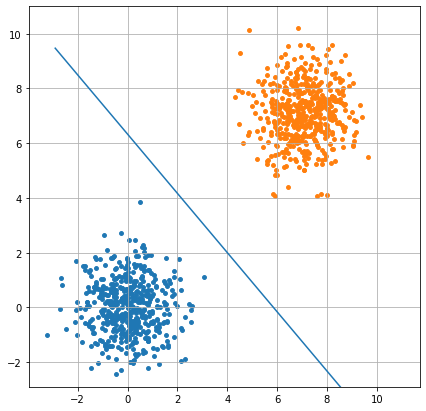

In [ ]:
#Finally plotting Classifier Line
x1 = np.linspace(-2.9,11,100)
y1 = -(w1/w2)*x1-(w3/w2)
plt.figure(figsize=(7,7))
plt.plot(x1,y1)
plt.scatter(blue[:,0],blue[:,1],s=15)
plt.scatter(orange[:,0],orange[:,1],s=15)
plt.ylim([-2.9,11])
plt.grid()
plt.show()

#Q3. MLP with a single hidden layer
[20 = dataset creation 3 + MLP definition 3 + backprop 10 + elegance/recursion 4]
Consider a binary classification dataset that is not linearly separable in 2D (e.g. data lying on the
circumference two concentric circles). Train a Multi layer perceptron (MLP) with a single hidden
layer for classifying the same. You may use the loss function used in problem 2. You have to
implement the gradient descent (i.e. backpropagation) algorithm yourself.

In [ ]:
#---------------------------------------------------------------code and explanation starts from here------------------------------------------------------------------#

Generating Dataset and labels

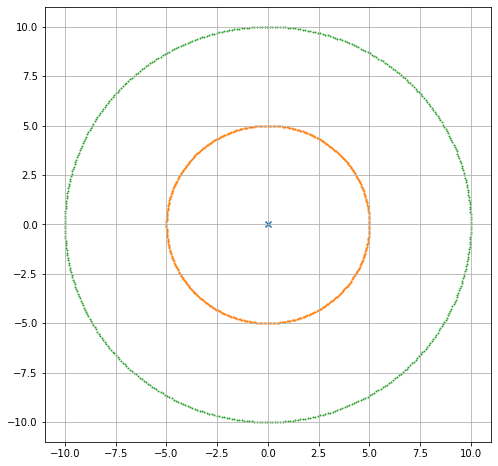

In [ ]:
#------------------------------------------------------------Dataset Creation i.e data lying on the circumference two concentric circles---------------------------#
np.random.seed(100)

center_x,center_y=0,0

circle1_r1 = 5
circle2_r2 = 10
circle1 =[]
circle2 =[]


angle = np.linspace(0, 360, 500, endpoint = True)
angle_redian=[(i*math.pi)/180 for i in angle ]

for theta in angle_redian:
  circle1.append([circle1_r1*math.cos(theta),circle1_r1*math.sin(theta)])
  circle2.append([circle2_r2*math.cos(theta),circle2_r2*math.sin(theta)])

circle1=np.array(circle1)
circle2=np.array(circle2)

plt.figure(figsize=(8,8))
plt.scatter(0,0,marker='x')
plt.scatter(circle1[:,0],circle1[:,1],s=1)
plt.scatter(circle2[:,0],circle2[:,1],s=1)
plt.xlim([-11,11])
plt.xlim([-11,11])
plt.grid()
plt.show()

  
#creating labels here there are two classes so label will be one hot vector [class1 class2] because last layer of NN will  have two neuron

#Label [1 0] for circle 1
circle1_label = [[1, 0] for i in range(500)]
circle1_label = np.array(circle1_label)


#Label [0 1] for circle 2
circle2_label = [[0, 1] for i in range(500)]
circle2_label = np.array(circle2_label)


#creating final dataset
dataset = np.concatenate([circle1, circle2])
#creating final labels
labels = np.concatenate([circle1_label, circle2_label])


#so now dataset and labels has final dataset and labels and index wise both are related

In [ ]:
dataset_train, dataset_test, labels_train, labels_test = train_test_split(dataset, labels, test_size=0.20, random_state=42,shuffle = True)

#Taking transpose because we have to match dimention in forward propogation

dataset_trainq, dataset_testq, labels_trainq, labels_testq = dataset_train.T, dataset_test.T, labels_train.T, labels_test.T


$ Relu(x) = \max(0,x)$

In [ ]:
def relu(x):
  return np.maximum(x,0)

In [ ]:
def derivative_of_relu(x):
    return np.array(x > 0, dtype = np.float32)

## Softmax 

$ Ypred = \frac{e^{a_i}}{\sum_{i=k}^ne^{a_k}}$

In [ ]:
def softmax(x):
  expX = np.exp(x)
  return expX /np.sum(expX,axis=0)

In [ ]:
#This will do initialization of parameter
def initialization(num_input,num_hidden1,num_output):
  w1 = np.random.randn(num_hidden1,num_input)*0.001
  b1 = np.zeros((num_hidden1,1))
  
  w2 = np.random.randn(num_output,num_hidden1)*0.01
  b2 = np.zeros((num_output,1))
  
  parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    } 
  return parameters

## Cost Function 
Using Cross Entropy as Loss Function

$Loss = - \sum_{i=k}^{n}[ y_k*log(a_k) ]$

$Cost = - \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{n}[ y_k*log(a_k) ]$

In [ ]:
def loss(y_pred,y):
  m = y.shape[1]
  loss = -(1/m)*np.sum(y*np.log(y_pred))
  return loss

## Forward Propagation 

$ A_1 = W_1 * X + B_1 $

$ H_1 = f ( A_1 ) $  

$ A_2 = W2 * A_1 + B_2 $

$ Y pred = Softmax( Z_2 ) $

In [ ]:
def forward_propagation(x, parameters):
    
    w1 = parameters['w1'] 
    b1 = parameters['b1'] 
    w2 = parameters['w2'] 
    b2 = parameters['b2'] 
    
    #pre-activation at 1st hidden layer
    a1 = np.dot(w1, x) + b1

    #after applying activation at 1st hidden layer
    h1 = relu(a1)
    
    #pre-activation at output layer
    a2 = np.dot(w2, h1) + b2

    #after applying activation - softmax at output layer
    y_pred = softmax(a2)
    
    forward_output = {
        "a1" : a1,
        "h1" : h1,
        "a2" : a2,
        "y_pred" : y_pred
    }
    
    return forward_output

## Gradient Calulation using Backward Propagation
$da_2 = ( Ypred - Y )$

$ dW_2 = \frac{1}{m}. dZ_2 . A_1^T$

$ dB_2 = \frac{1}{m}.sum(da_2, 1)$

$da_1 = W_2^T . dZ_2 * f_1^|(a_1) $

$dW_1 = \frac{1}{m}.da_1.X^T$

$dB_1 = \frac{1}{m}.sum(da_1, 1)$

In [ ]:
def backward_propagation(x, y, parameters, forward_cache):
    
    w1 = parameters['w1'] 
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    h1 = forward_cache['h1']
    y_pred = forward_cache['y_pred']
    
    m = x.shape[1]
    
    da2 = (y_pred - y)
    dw2 = (1/m)*np.dot(da2, h1.T)
    db2 = (1/m)*np.sum(da2, axis = 1, keepdims = True)
    
    da1 = (1/m)*np.dot(w2.T, da2)*derivative_of_relu(h1)
    dw1 = (1/m)*np.dot(da1, x.T)
    db1 = (1/m)*np.sum(da1, axis = 1, keepdims = True)
    
    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }
    
    return gradients

##  Parameters Updatation using gradient descent

$ W_2 = W_2 -  \alpha * \frac{\partial Cost }{\partial W_2}$ 

$ B_2 = B_2 -  \alpha * \frac{\partial Cost }{\partial B_2}$ 

$ W_1 = W_1 -  \alpha * \frac{\partial Cost }{\partial W_1}$ 

$ B_1 = B_1 -  \alpha * \frac{\partial Cost }{\partial B_1}$ 

In [ ]:
def GD_(parameters, gradients, learning_rate):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']
    
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

In [ ]:
def neural_network(x, y, number_of_neuron, learning_rate, iterations):
    
    number_input = x.shape[0]
    number_output = y.shape[0]
    
    loss_ = []
    
    parameters = initialization(number_input, number_of_neuron, number_output)
    
    for i in range(iterations):
        
        forward_result = forward_propagation(x, parameters)
        
        cost = loss(forward_result['y_pred'], y)
        
        gradients = backward_propagation(x, y, parameters, forward_result)
        
        parameters = GD_(parameters, gradients, learning_rate)
        
        loss_.append(cost)
          
    return parameters, loss_

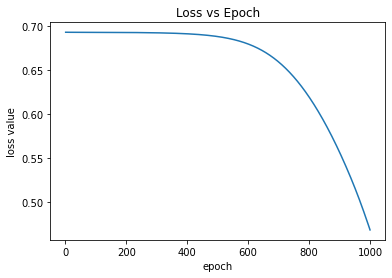

In [ ]:
iterations = 1000

#taking number of neuron as 4 in hidden layer
number_of_neuron= 4
learning_rate = 0.25

Parameters, loss = neural_network(dataset_trainq, labels_trainq, number_of_neuron, learning_rate, iterations)

#ploting the Graph between loss and iterations
epoch = [i+1 for i in range(1000)]
plt.plot(epoch,loss)
plt.xlabel("epoch")
plt.ylabel("loss value")
plt.title("Loss vs Epoch")
plt.show()

In [ ]:
#predicting the accuracy using Final Parameter values
def accuracy(inp, labels, parameters):

    #Passing the final parameter in forward pass to get Y_pred
    forward_ = forward_propagation(inp, parameters)
    
    a_out = forward_['y_pred']   # containes propabilities
    a_out = np.argmax(a_out, 0)  
    
    labels = np.argmax(labels, 0)
    
    accuracy_score = np.mean(a_out == labels)*100
    
    return accuracy_score

In [ ]:
#------------------------------------------------------------Final accuracy---------------------------------------------------------------------------------#

In [ ]:
#predicting the accuracy using Final Parameter values
def accuracy(inp, labels, parameters):

    #Passing the final parameter in forward pass to get Y_pred
    forward_ = forward_propagation(inp, parameters)
    
    a_out = forward_['y_pred']   #probabilities
    
    #Finding the index with the max probabilites
    a_out = np.argmax(a_out, 0)  
    
    #taking the index where 1 is in one hot encoded label
    labels = np.argmax(labels, 0)
    
    #findig accuracy using accuracy_score of Sklearn
    print((accuracy_score(labels,a_out))*100)

In [ ]:
print("Accuracy of Train Dataset:")
accuracy(dataset_trainq, labels_trainq, Parameters)
print("Accuracy of Test Dataset:")
accuracy(dataset_testq, labels_testq, Parameters)
print()

Accuracy of Train Dataset:
93.25
Accuracy of Test Dataset:
91.0

